## Group Assignment 2  

Allison KO, 

Balajigowda H S, 

Arnav Pravin Chaudhari, 

Liam Klass

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import scale

In [ ]:
%cd /Users/seulgiko/Desktop/DNSC6314

/Users/seulgiko/Desktop/DNSC6314


### Loading Weather data

In [3]:
weather = pd.read_csv('E:\GW Class\GW Spring 2024\Machine Learning 1\group Assignment\Washington D_C 2023-01-01 to 2023-06-30.csv')
weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,Washington D>C,2023-01-01,61.4,43.5,51.8,61.4,41.7,51.2,46.2,82.2,...,8.7,4,10,2023-01-01T07:26:52,2023-01-01T16:56:42,0.32,"Rain, Partially cloudy",Clearing in the afternoon with morning rain.,rain,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
1,Washington D>C,2023-01-02,63.0,40.0,50.9,63.0,36.3,50.2,44.2,79.3,...,5.7,4,10,2023-01-02T07:26:59,2023-01-02T16:57:31,0.35,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
2,Washington D>C,2023-01-03,68.0,50.1,59.3,68.0,50.1,59.3,52.3,78.5,...,3.4,2,10,2023-01-03T07:27:04,2023-01-03T16:58:22,0.39,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
3,Washington D>C,2023-01-04,65.0,53.3,59.5,65.0,53.3,59.5,55.0,85.4,...,2.8,2,10,2023-01-04T07:27:07,2023-01-04T16:59:14,0.42,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."
4,Washington D>C,2023-01-05,64.0,49.6,56.4,64.0,45.1,55.9,46.0,70.4,...,6.0,4,10,2023-01-05T07:27:08,2023-01-05T17:00:08,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,72403793728,KADW,KDAA,AS365,7..."


In [4]:
weather.columns

Index(['name', 'datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'preciptype', 'snow', 'snowdepth', 'windgust',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'severerisk', 'sunrise',
       'sunset', 'moonphase', 'conditions', 'description', 'icon', 'stations'],
      dtype='object')

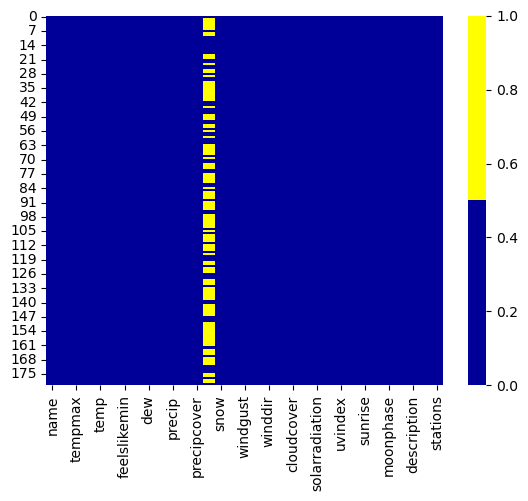

In [5]:
# Date time format
weather['datetime'] = pd.to_datetime(weather['datetime']).dt.date

# Use sns heatmap to see whats are the null values.
coln = weather.columns[:weather.shape[1]]
colors = ['#000099','#ffff00'] # specify the colors - yellow is missing. blue is not missing.
sns.heatmap(weather[coln].isnull(), cmap = sns.color_palette(colors))
plt.show()

In [6]:
# Drop unnecessary variables
df_weather=weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

In [7]:
df_weather.columns

Index(['datetime', 'tempmax', 'tempmin', 'temp', 'feelslikemax',
       'feelslikemin', 'feelslike', 'dew', 'humidity', 'precip', 'precipprob',
       'precipcover', 'snow', 'snowdepth', 'windspeed', 'winddir',
       'sealevelpressure', 'cloudcover', 'visibility', 'solarradiation',
       'solarenergy', 'uvindex', 'moonphase', 'icon'],
      dtype='object')

In [8]:
 #read csv files
df_Feb=pd.read_csv("E:/GW Class/GW Spring 2024/Machine Learning 1/group Assignment/202302-captialbikeshare-tripdata.csv")
df_Mar=pd.read_csv("E:/GW Class/GW Spring 2024/Machine Learning 1/group Assignment/202303-capitalbikeshare-tripdata.csv")
df_Apr=pd.read_csv("E:/GW Class/GW Spring 2024/Machine Learning 1/group Assignment/202304-capitalbikeshare-tripdata.csv")
df_May=pd.read_csv("E:/GW Class/GW Spring 2024/Machine Learning 1/group Assignment/202305-capitalbikeshare-tripdata.csv")
df_Jun=pd.read_csv("E:/GW Class/GW Spring 2024/Machine Learning 1/group Assignment/202306-capitalbikeshare-tripdata.csv")

In [9]:
# concat data
bikeshare=pd.concat([df_Feb,df_Mar,df_Apr,df_May,df_Jun])
bikeshare.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1749886 entries, 0 to 430669
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    float64
 6   end_station_name    object 
 7   end_station_id      float64
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(6), object(7)
memory usage: 186.9+ MB


In [10]:
bikeshare.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6D7F3F3DDD864A41,classic_bike,2023-02-04 21:08:26,2023-02-04 21:16:39,New Jersey Ave & N St NW/Dunbar HS,31636.0,8th & V St NW,31134.0,38.907333,-77.015360,38.917716,-77.022684,member
1,1B4FD92511BA8869,classic_bike,2023-02-28 18:24:01,2023-02-28 18:28:46,11th & Girard St NW,31126.0,8th & V St NW,31134.0,38.925636,-77.027112,38.917716,-77.022684,member
2,E215D5A904EC376F,classic_bike,2023-02-12 14:03:48,2023-02-12 14:05:44,3rd & H St NW,31604.0,1st & H St NW,31638.0,38.899408,-77.015289,38.900358,-77.012108,member
3,AF176FEC3204AEB5,classic_bike,2023-02-08 19:25:13,2023-02-08 19:33:08,7th St & Florida Ave NW,31109.0,7th & F St NW / National Portrait Gallery,31232.0,38.916137,-77.022003,38.897283,-77.022191,member
4,CB8BE52EB8F58E80,classic_bike,2023-02-27 14:48:59,2023-02-27 14:54:10,8th & V St NW,31134.0,8th & V St NW,31134.0,38.917716,-77.022684,38.917716,-77.022684,member


In [11]:
# Transform time to date ONLY
bikeshare['started_at_date'] = pd.to_datetime(bikeshare['started_at']).dt.date
bikeshare['ended_at_date'] = pd.to_datetime(bikeshare['ended_at']).dt.date

In [12]:
bikeshare.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,started_at_date,ended_at_date
0,6D7F3F3DDD864A41,classic_bike,2023-02-04 21:08:26,2023-02-04 21:16:39,New Jersey Ave & N St NW/Dunbar HS,31636.0,8th & V St NW,31134.0,38.907333,-77.015360,38.917716,-77.022684,member,2023-02-04,2023-02-04
1,1B4FD92511BA8869,classic_bike,2023-02-28 18:24:01,2023-02-28 18:28:46,11th & Girard St NW,31126.0,8th & V St NW,31134.0,38.925636,-77.027112,38.917716,-77.022684,member,2023-02-28,2023-02-28
2,E215D5A904EC376F,classic_bike,2023-02-12 14:03:48,2023-02-12 14:05:44,3rd & H St NW,31604.0,1st & H St NW,31638.0,38.899408,-77.015289,38.900358,-77.012108,member,2023-02-12,2023-02-12
3,AF176FEC3204AEB5,classic_bike,2023-02-08 19:25:13,2023-02-08 19:33:08,7th St & Florida Ave NW,31109.0,7th & F St NW / National Portrait Gallery,31232.0,38.916137,-77.022003,38.897283,-77.022191,member,2023-02-08,2023-02-08
4,CB8BE52EB8F58E80,classic_bike,2023-02-27 14:48:59,2023-02-27 14:54:10,8th & V St NW,31134.0,8th & V St NW,31134.0,38.917716,-77.022684,38.917716,-77.022684,member,2023-02-27,2023-02-27


In [13]:
# Group and get pickup occurrence for 22nd & H St NW
df_sub1 = bikeshare[bikeshare['start_station_name']=="22nd & H St NW"]
df_grp1 = df_sub1.groupby(['started_at_date','start_station_name']).size()
df_pu=df_grp1.reset_index(name = "pu_ct")
df_pu

,started_at_date,start_station_name,pu_ct
0,2023-02-01,22nd & H St NW,20
1,2023-02-02,22nd & H St NW,26
2,2023-02-03,22nd & H St NW,14
3,2023-02-04,22nd & H St NW,12
4,2023-02-05,22nd & H St NW,17
...,...,...,...
145,2023-06-26,22nd & H St NW,21
146,2023-06-27,22nd & H St NW,20
147,2023-06-28,22nd & H St NW,26
148,2023-06-29,22nd & H St NW,32


In [14]:
# Group and get drop off occurrence for 22nd & H St NW
df_sub2 = bikeshare[bikeshare['end_station_name']=="22nd & H St NW"]
df_grp2 = df_sub2.groupby(['ended_at_date','end_station_name']).size()
df_do=df_grp2.reset_index(name = "do_ct")
df_do

,ended_at_date,end_station_name,do_ct
0,2023-02-01,22nd & H St NW,24
1,2023-02-02,22nd & H St NW,28
2,2023-02-03,22nd & H St NW,17
3,2023-02-04,22nd & H St NW,13
4,2023-02-05,22nd & H St NW,24
...,...,...,...
145,2023-06-26,22nd & H St NW,18
146,2023-06-27,22nd & H St NW,21
147,2023-06-28,22nd & H St NW,26
148,2023-06-29,22nd & H St NW,43


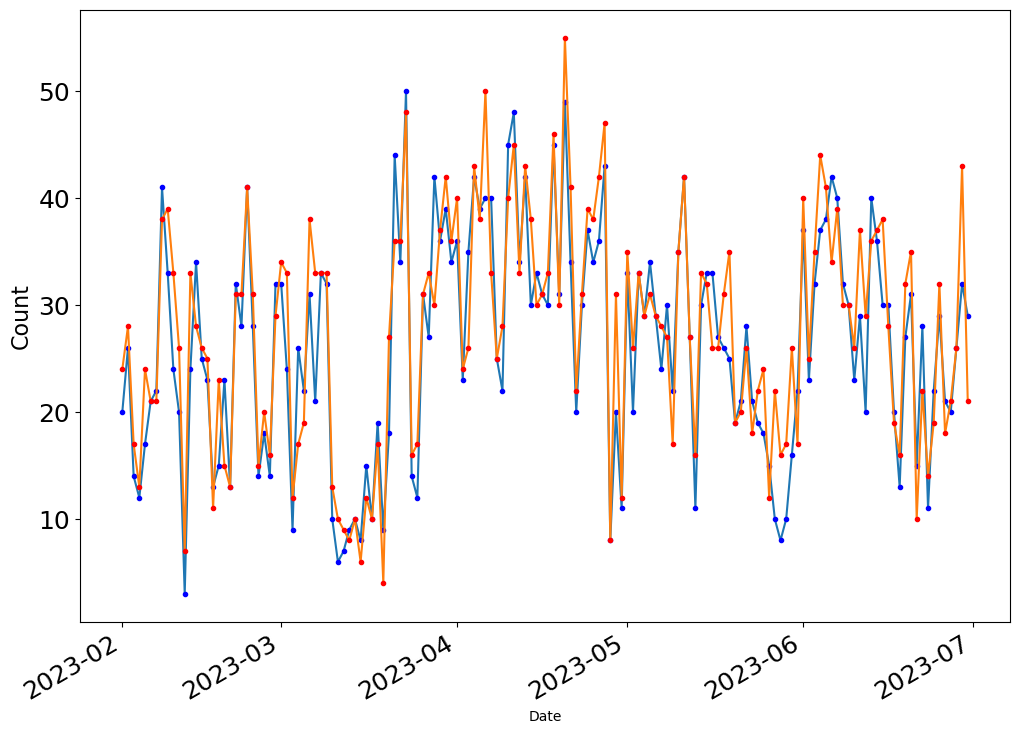

In [15]:
fig, ax1 = plt.subplots(figsize=(12, 9))
ax1.plot_date( df_pu['started_at_date'], df_pu['pu_ct'],linestyle = 'solid',markeredgecolor = 'blue',markerfacecolor = 'blue', markersize = 3)
ax1.plot_date( df_do['ended_at_date'], df_do['do_ct'],linestyle = 'solid',markeredgecolor = 'red',markerfacecolor = 'red', markersize = 3)

ax1.set_xlabel('Date',fontsize=10)
ax1.set_ylabel('Count',fontsize=16)
plt.gcf().autofmt_xdate()

plt.tick_params(labelsize=18)
plt.show()

In [16]:
df_merged = df_pu.merge(df_do, left_on='started_at_date', right_on='ended_at_date')
#df_merged = df_m_pu.drop(columns=['started_at_date','start_station_name','datetime'])

In [17]:
df_merged

,started_at_date,start_station_name,pu_ct,ended_at_date,end_station_name,do_ct
0,2023-02-01,22nd & H St NW,20,2023-02-01,22nd & H St NW,24
1,2023-02-02,22nd & H St NW,26,2023-02-02,22nd & H St NW,28
2,2023-02-03,22nd & H St NW,14,2023-02-03,22nd & H St NW,17
3,2023-02-04,22nd & H St NW,12,2023-02-04,22nd & H St NW,13
4,2023-02-05,22nd & H St NW,17,2023-02-05,22nd & H St NW,24
...,...,...,...,...,...,...
145,2023-06-26,22nd & H St NW,21,2023-06-26,22nd & H St NW,18
146,2023-06-27,22nd & H St NW,20,2023-06-27,22nd & H St NW,21
147,2023-06-28,22nd & H St NW,26,2023-06-28,22nd & H St NW,26
148,2023-06-29,22nd & H St NW,32,2023-06-29,22nd & H St NW,43


In [18]:
# Merge with weather data and remove dates and station name
# pickup data
df_merged = df_merged.merge(df_weather, left_on='started_at_date', right_on='datetime')
df_merged = df_merged.drop(columns=['started_at_date','start_station_name','datetime'])


In [19]:
df_merged.head()

,pu_ct,ended_at_date,end_station_name,do_ct,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,20,2023-02-01,22nd & H St NW,24,40.7,32.5,35.6,37.4,23.9,29.1,...,15.3,347.8,1025.5,81.8,9.1,130.3,11.2,6,0.36,snow
1,26,2023-02-02,22nd & H St NW,28,41.8,31.3,36.0,36.8,28.1,32.2,...,11.3,199.9,1021.8,94.5,9.9,87.7,7.5,4,0.40,cloudy
2,14,2023-02-03,22nd & H St NW,17,40.7,19.8,31.7,34.1,4.3,20.7,...,28.1,317.1,1021.4,54.6,9.9,143.9,12.5,6,0.43,partly-cloudy-day
3,12,2023-02-04,22nd & H St NW,13,31.9,16.9,24.5,23.0,2.6,15.1,...,16.9,221.9,1035.2,27.8,9.9,150.7,13.1,6,0.46,partly-cloudy-day
4,17,2023-02-05,22nd & H St NW,24,58.8,33.0,44.2,58.8,22.9,39.9,...,17.9,195.8,1022.1,79.7,9.9,116.1,9.9,5,0.50,partly-cloudy-day


In [20]:
df_merged.columns

Index(['pu_ct', 'ended_at_date', 'end_station_name', 'do_ct', 'tempmax',
       'tempmin', 'temp', 'feelslikemax', 'feelslikemin', 'feelslike', 'dew',
       'humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth',
       'windspeed', 'winddir', 'sealevelpressure', 'cloudcover', 'visibility',
       'solarradiation', 'solarenergy', 'uvindex', 'moonphase', 'icon'],
      dtype='object')

In [21]:
df_merged.shape

(150, 27)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

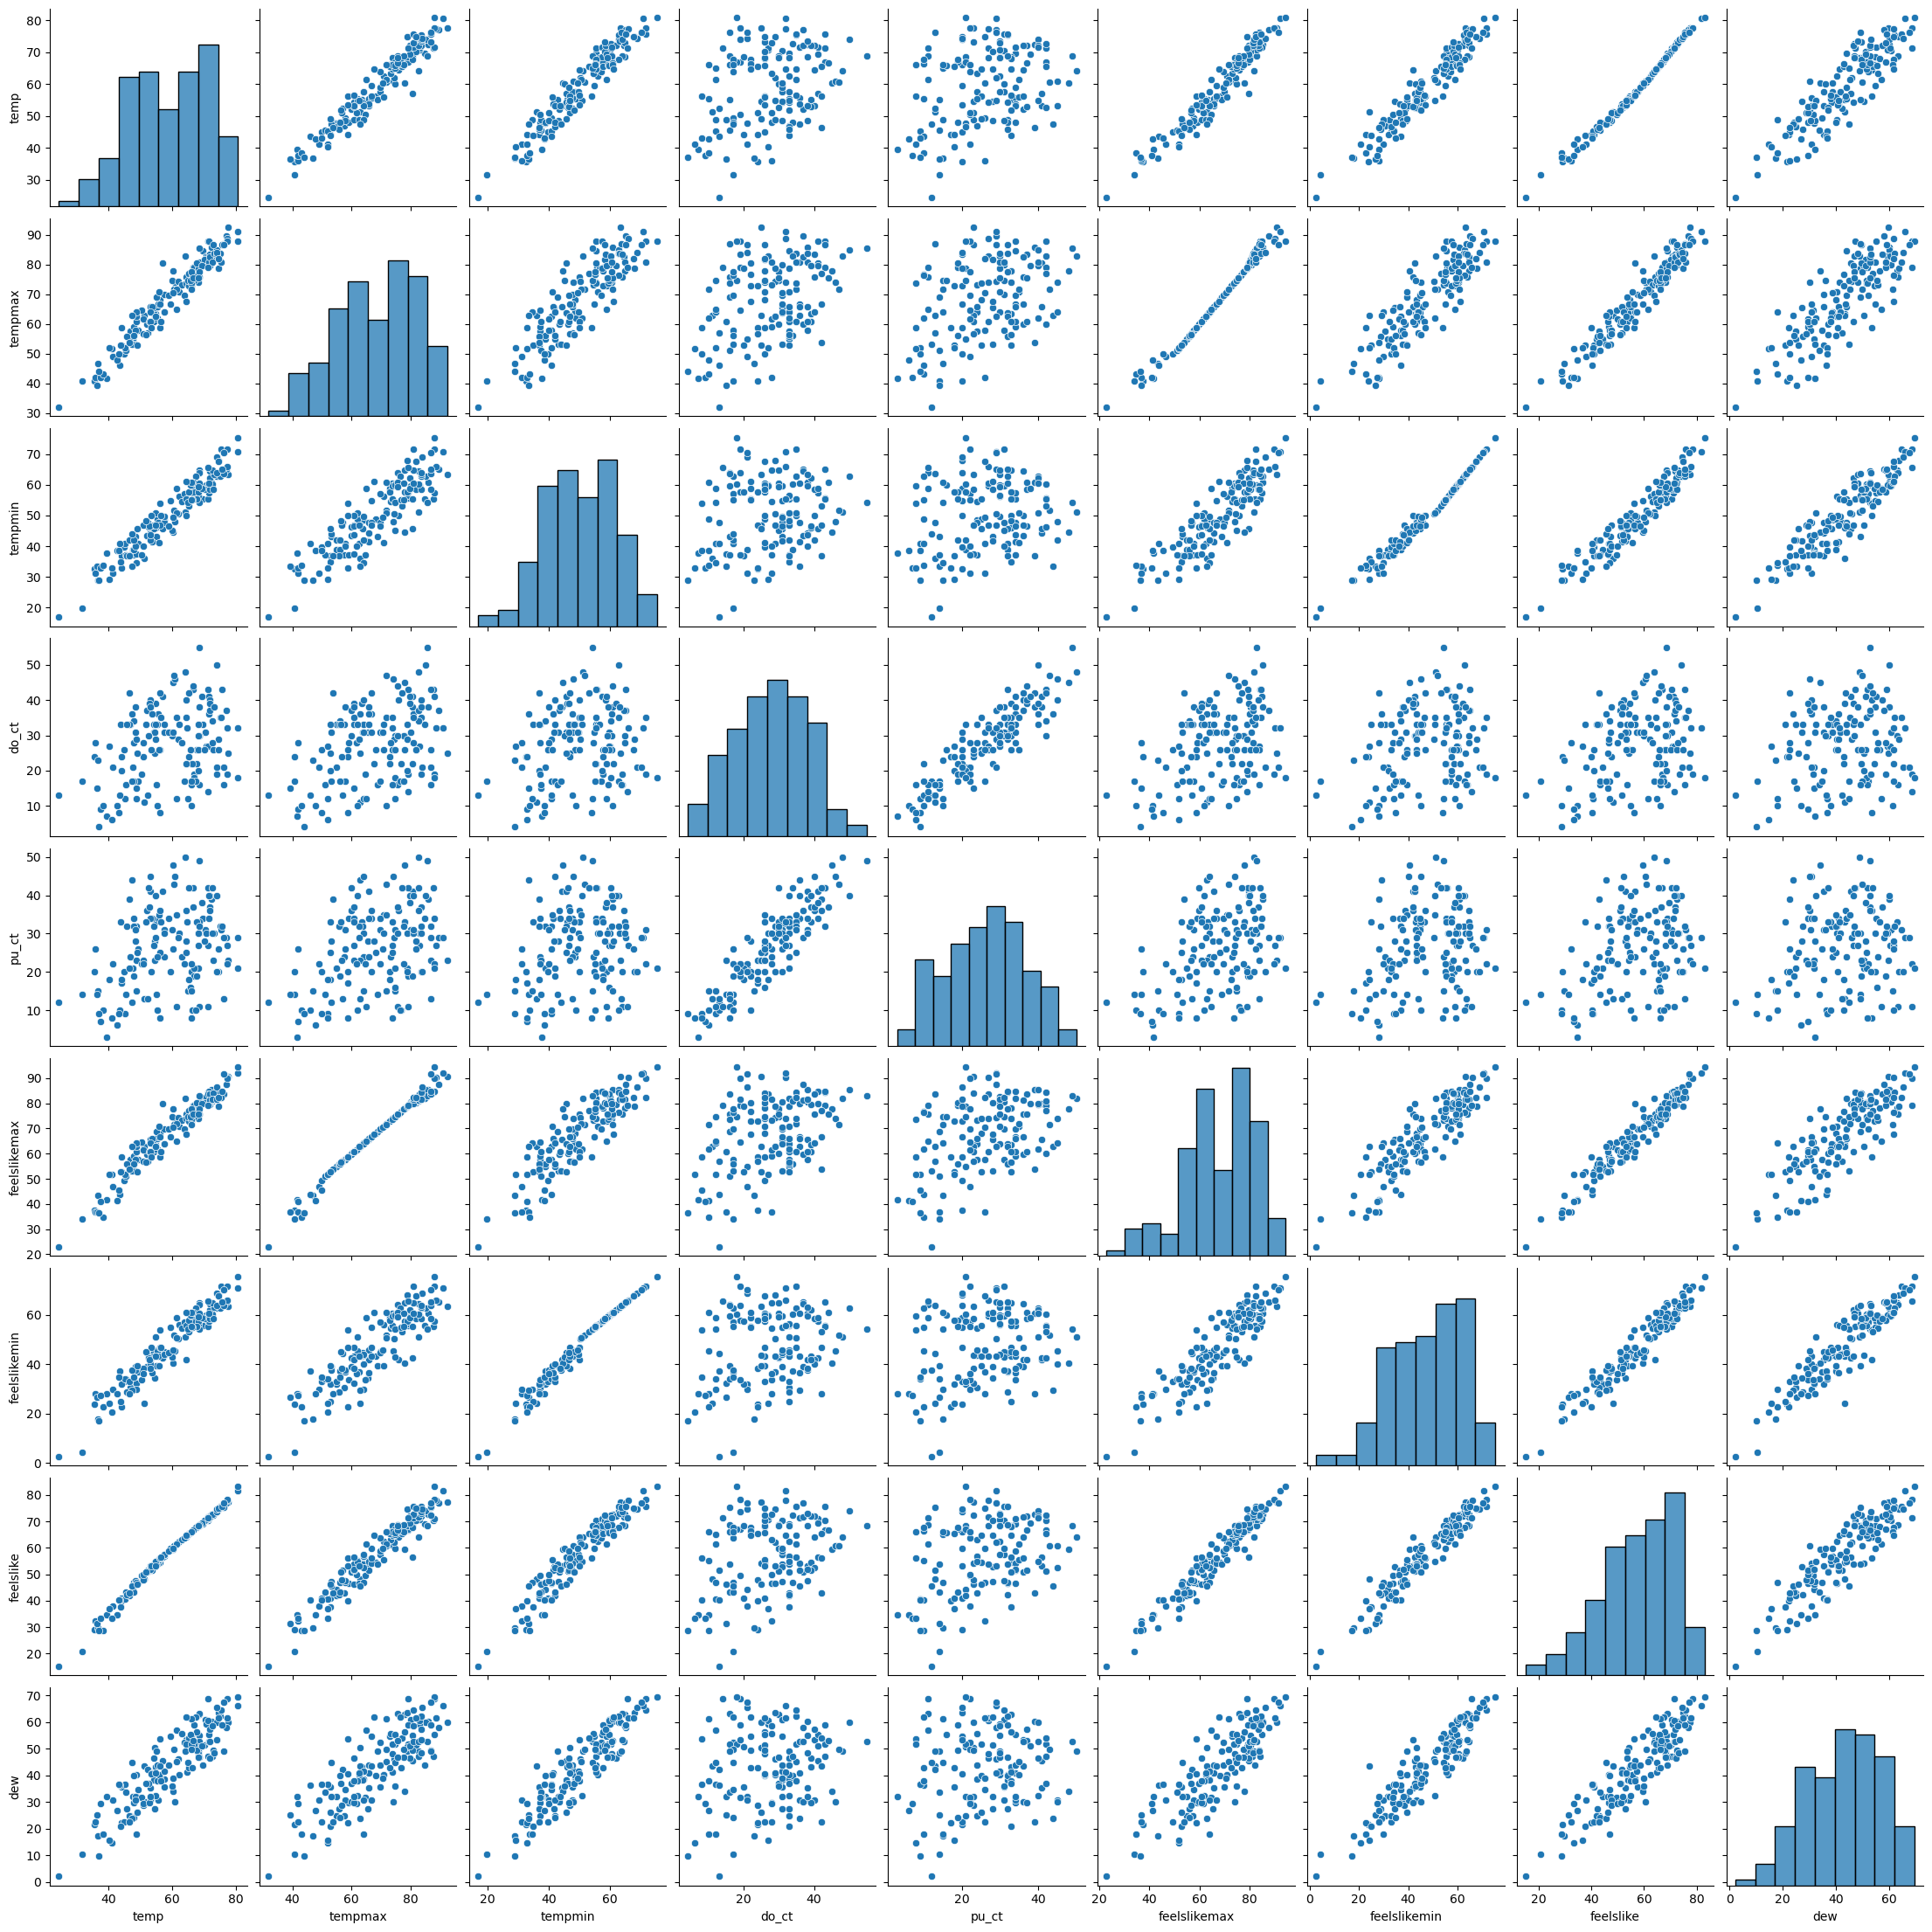

In [22]:
sns.pairplot(df_merged[["temp", "tempmax", "tempmin", "do_ct","pu_ct",'feelslikemax', 'feelslikemin', 'feelslike', 'dew']], markers="o")

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

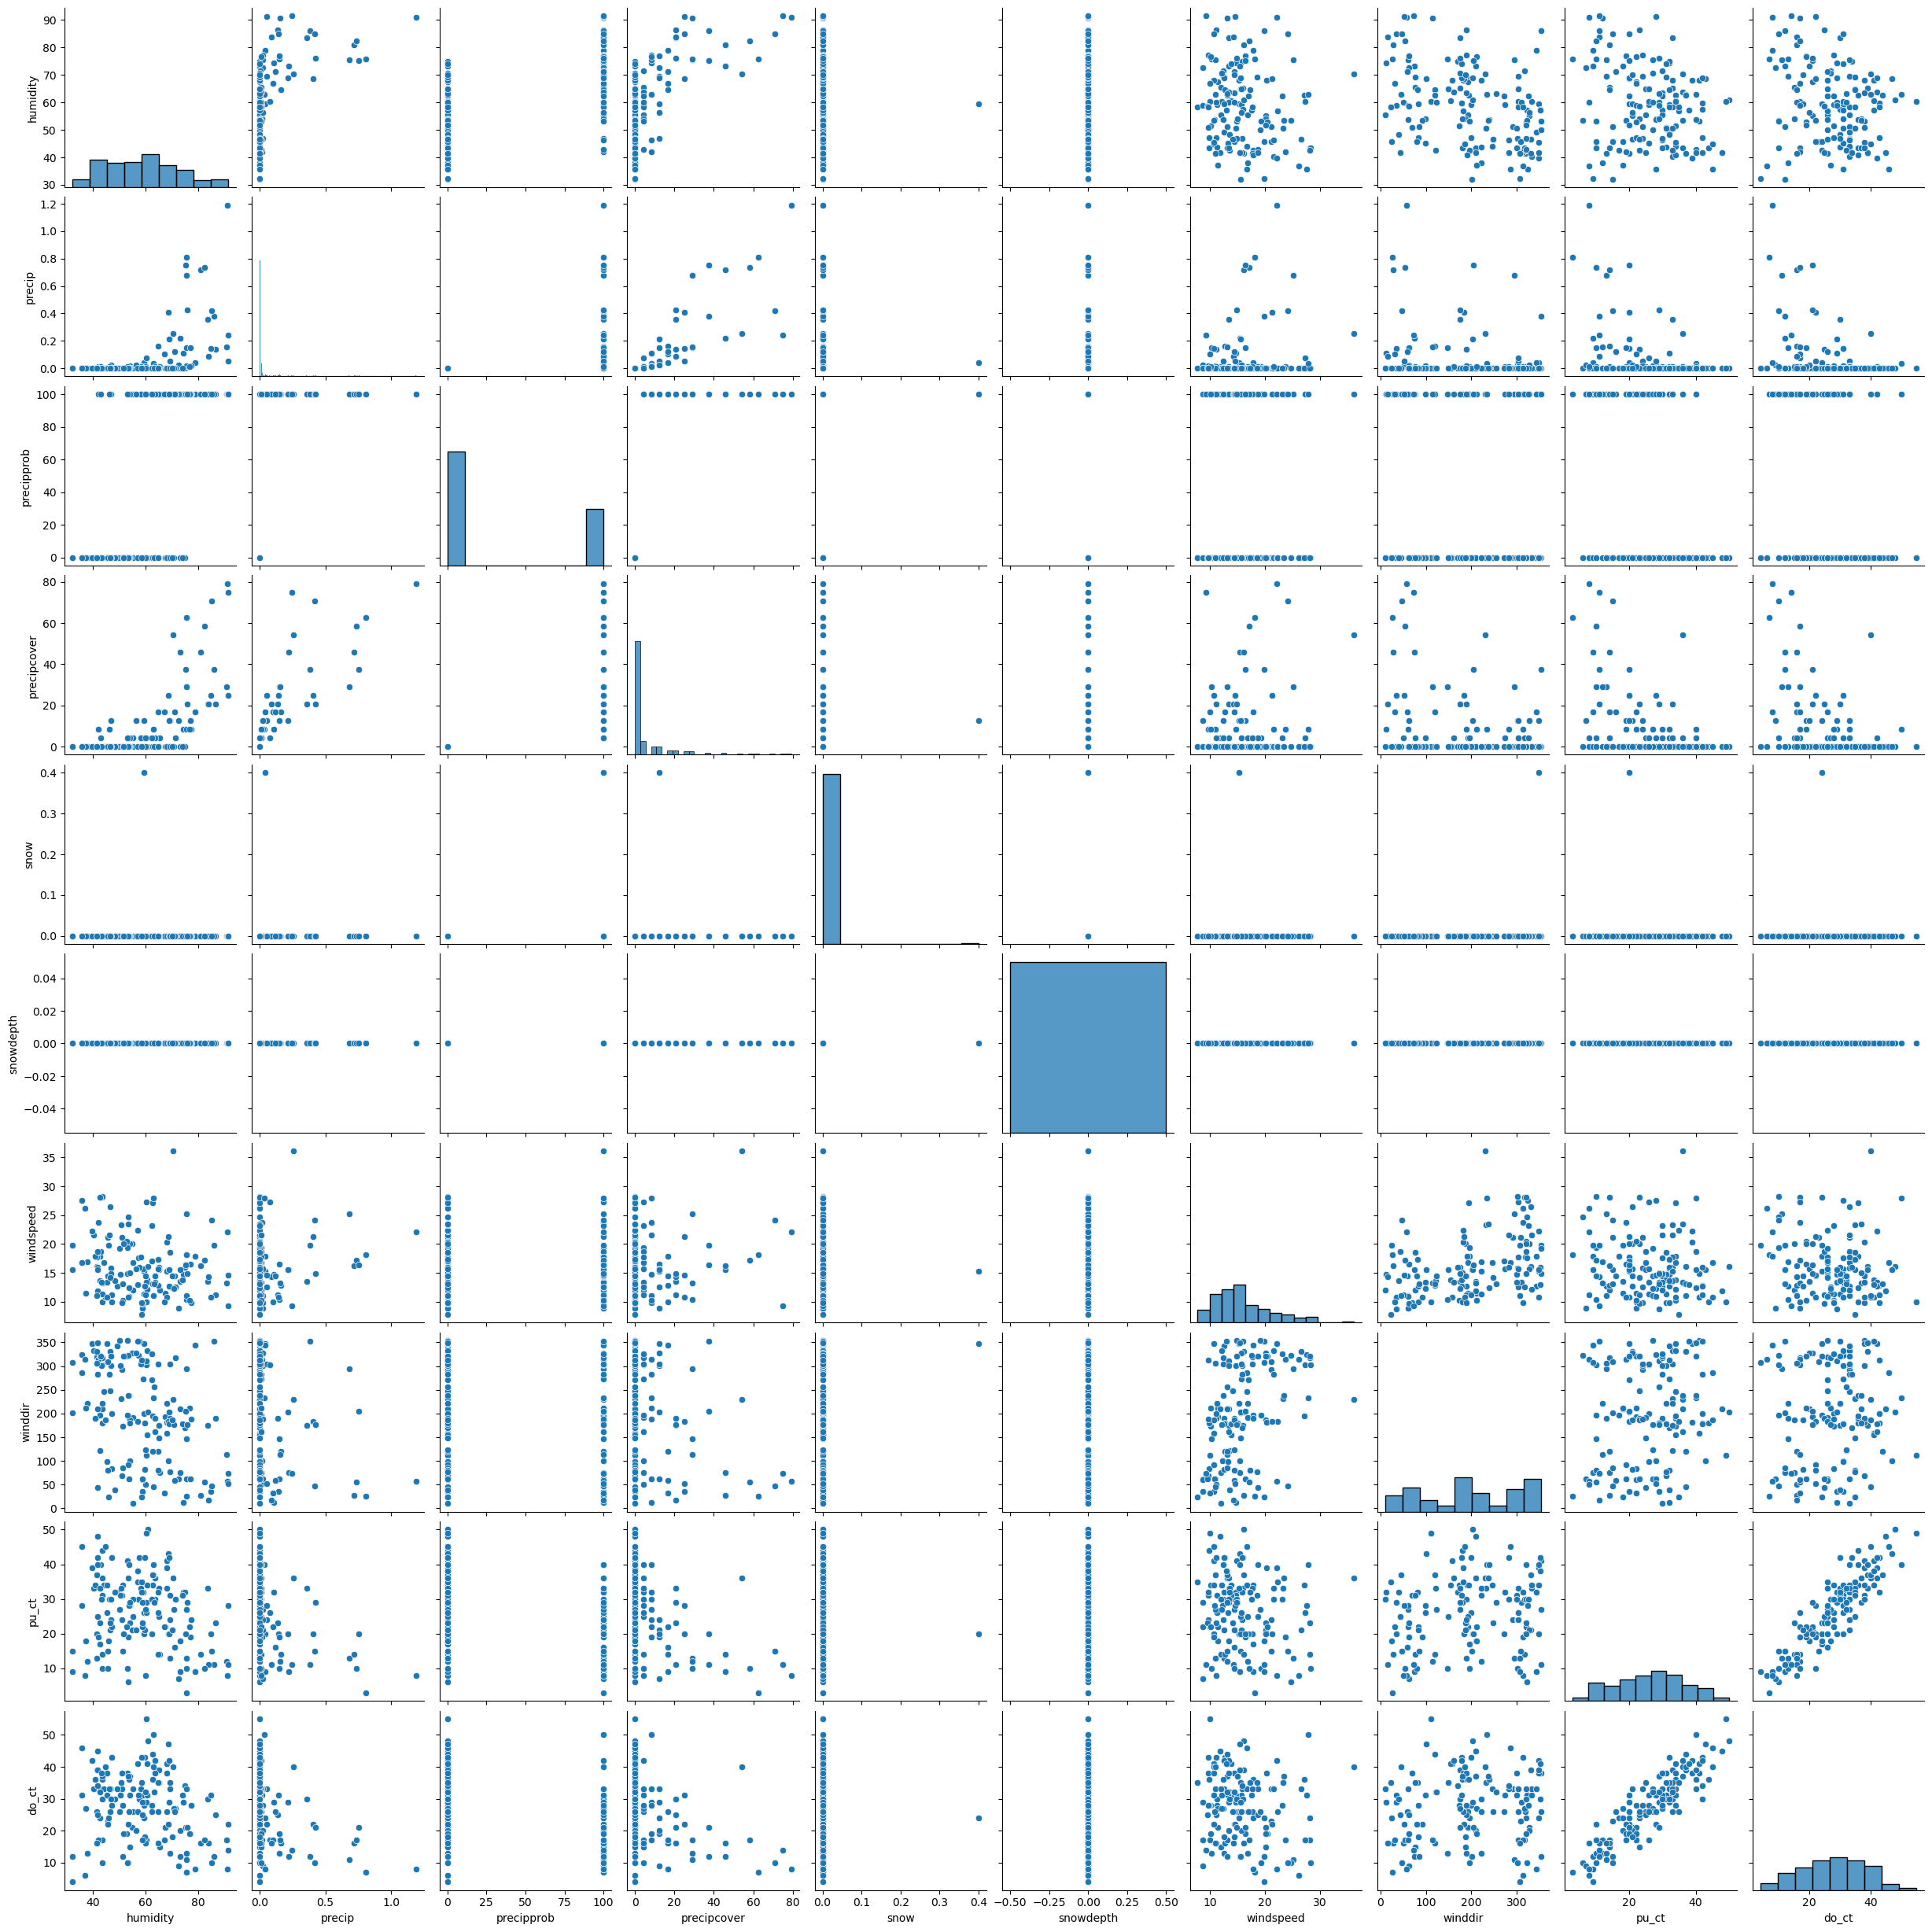

In [23]:
sns.pairplot(df_merged[['humidity', 'precip', 'precipprob', 'precipcover', 'snow', 'snowdepth',
       'windspeed', 'winddir','pu_ct','do_ct']], markers="o")

In [24]:
numeric_columns = df_merged.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df_merged[numeric_columns].corr()


In [25]:
correlation_matrix

,pu_ct,do_ct,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,snowdepth,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase
pu_ct,1.000000,0.900415,0.414777,0.201049,0.322562,0.418616,0.242066,0.345536,0.150295,-0.233604,...,NaN,-0.135781,0.161662,0.048966,-0.264691,0.119028,0.395291,0.396304,0.447322,-0.017401
do_ct,0.900415,1.000000,0.409863,0.220074,0.329028,0.409044,0.252089,0.347944,0.165338,-0.217861,...,NaN,-0.150468,0.105809,0.047795,-0.238928,0.134701,0.369002,0.368381,0.439801,-0.052989
tempmax,0.414777,0.409863,1.000000,0.873274,0.967999,0.992709,0.882101,0.963399,0.823994,0.138499,...,NaN,-0.228571,-0.162653,-0.280327,-0.087332,-0.167452,0.412431,0.412401,0.425081,-0.057968
tempmin,0.201049,0.220074,0.873274,1.000000,0.959838,0.881531,0.989555,0.957160,0.915830,0.333493,...,NaN,-0.180730,-0.199978,-0.415514,0.198090,-0.301591,0.157038,0.155320,0.170846,-0.101489
temp,0.322562,0.329028,0.967999,0.959838,1.000000,0.966996,0.959631,0.995441,0.890402,0.218328,...,NaN,-0.204072,-0.177487,-0.351814,0.031348,-0.235737,0.311888,0.311015,0.319724,-0.068242
feelslikemax,0.418616,0.409044,0.992709,0.881531,0.966996,1.000000,0.891040,0.969037,0.836917,0.166789,...,NaN,-0.231217,-0.178356,-0.285117,-0.056249,-0.169241,0.381381,0.381320,0.398949,-0.074501
feelslikemin,0.242066,0.252089,0.882101,0.989555,0.959631,0.891040,1.000000,0.965747,0.920724,0.347181,...,NaN,-0.255373,-0.240145,-0.389395,0.192152,-0.285547,0.168015,0.166747,0.182045,-0.113280
feelslike,0.345536,0.347944,0.963399,0.957160,0.995441,0.969037,0.965747,1.000000,0.897306,0.241866,...,NaN,-0.235080,-0.197836,-0.350834,0.054773,-0.228932,0.288005,0.287394,0.301041,-0.088077
dew,0.150295,0.165338,0.823994,0.915830,0.890402,0.836917,0.920724,0.897306,1.000000,0.633766,...,NaN,-0.230873,-0.329771,-0.416460,0.311134,-0.318540,-0.032590,-0.033149,0.009410,-0.178036
humidity,-0.233604,-0.217861,0.138499,0.333493,0.218328,0.166789,0.347181,0.241866,0.633766,1.000000,...,NaN,-0.163950,-0.413581,-0.310842,0.592023,-0.320876,-0.590028,-0.589663,-0.516821,-0.262897


## Linear regression for pickups

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [27]:
# pickup
y = df_merged['pu_ct']
X = df_merged[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']]
X.head()

,tempmax,feelslikemax,precipcover,humidity,windspeed
0,40.7,37.4,12.5,59.4,15.3
1,41.8,36.8,0.0,59.2,11.3
2,40.7,34.1,0.0,43.4,28.1
3,31.9,23.0,0.0,37.9,16.9
4,58.8,58.8,0.0,42.6,17.9


In [28]:
X.shape

(150, 5)

In [29]:
y = pd.DataFrame()
y['pu_ct']=df_merged['pu_ct']
y['do_ct']=df_merged['do_ct']
X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 400)

In [30]:
X_train.head()

,tempmax,feelslikemax,precipcover,humidity,windspeed
8,63.4,63.4,0.00,65.1,16.0
35,52.9,52.9,0.00,40.3,21.5
54,60.8,60.8,8.33,75.5,11.0
91,56.5,56.5,4.17,58.2,17.7
121,92.5,90.6,0.00,58.6,9.6


In [31]:
y_train.head()

,pu_ct,do_ct
8,33,39
35,33,33
54,27,33
91,33,33
121,23,25


### Linear Model for Pickups

In [32]:
ModelR1 = LinearRegression()
ModelR1.fit(X_train[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']], y_train[['pu_ct']])
print(pd.Series(ModelR1.coef_.flatten(), index=X_train[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']].columns))

tempmax         0.116389
feelslikemax    0.149139
precipcover    -0.310223
humidity        0.029078
windspeed      -0.097446
dtype: float64


In [33]:
y15_pred_train = ModelR1.predict(X_train[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']])
mse15_train = round(mean_squared_error(y_train['pu_ct'], y15_pred_train),3)
r_squared = r2_score(y_train['pu_ct'], y15_pred_train)
print(f"MSE in training data is {mse15_train}")
print("Coefficient of determination (R-squared): %.2f" % r_squared)

MSE in training data is 66.738
Coefficient of determination (R-squared): 0.32


In [34]:
yR1_pred_test = ModelR1.predict(X_test[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']]) # use X_test
mseR1_test_pu = round(mean_squared_error(y_test['pu_ct'], yR1_pred_test),3) # use y_test
r_squared_pu = r2_score(y_test['pu_ct'], yR1_pred_test)
print(f"MSE in test data is {mseR1_test_pu}")
print("Coefficient of determination (R-squared): %.2f" % r_squared_pu)

MSE in test data is 83.054
Coefficient of determination (R-squared): 0.34


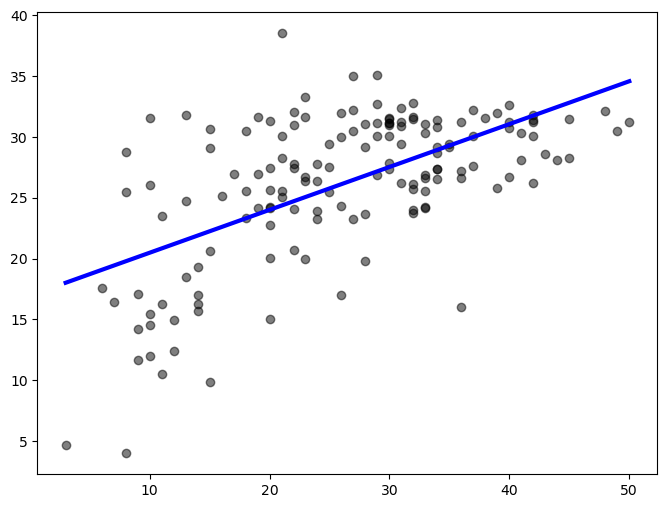

In [35]:
modelR1 = smf.ols(formula='pu_ct ~ tempmax+feelslikemax+precipcover+humidity+windspeed', data=df_merged)
result = modelR1.fit()

predicted_values = result.predict()

plt.figure(figsize=(8, 6))
plt.scatter(df_merged['pu_ct'], predicted_values, alpha=0.5, color = 'black')
plt.plot(np.unique(df_merged['pu_ct']), np.poly1d(np.polyfit(df_merged['pu_ct'], predicted_values, 1))(np.unique(df_merged['pu_ct'])), color='blue', linewidth = 3)
plt.show()

### Linear Regression for Dropoffs

In [36]:
ModelR2 = LinearRegression()
ModelR2.fit(X_train[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']], y_train[['do_ct']])
print(pd.Series(ModelR1.coef_.flatten(), index=X_train[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']].columns))

tempmax         0.116389
feelslikemax    0.149139
precipcover    -0.310223
humidity        0.029078
windspeed      -0.097446
dtype: float64


In [37]:
yR2_pred_train = ModelR2.predict(X_train[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']])
mseR2_train = round(mean_squared_error(y_train['do_ct'], y15_pred_train),3)
r_squared = r2_score(y_train['do_ct'], yR2_pred_train)
print(f"MSE in training data is {mseR2_train}")
print("Coefficient of determination (R-squared): %.2f" % r_squared)

MSE in training data is 80.187
Coefficient of determination (R-squared): 0.28


In [38]:
yR2_pred_test = ModelR2.predict(X_test[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']]) # use X_test
mseR2_test_do = round(mean_squared_error(y_test['do_ct'], yR2_pred_test),3) # use y_test
r_squared_do = r2_score(y_test['do_ct'], yR2_pred_test)
print(f"MSE in test data is {mseR2_test_do}")
print("Coefficient of determination (R-squared): %.2f" % r_squared_do)

MSE in test data is 76.515
Coefficient of determination (R-squared): 0.33


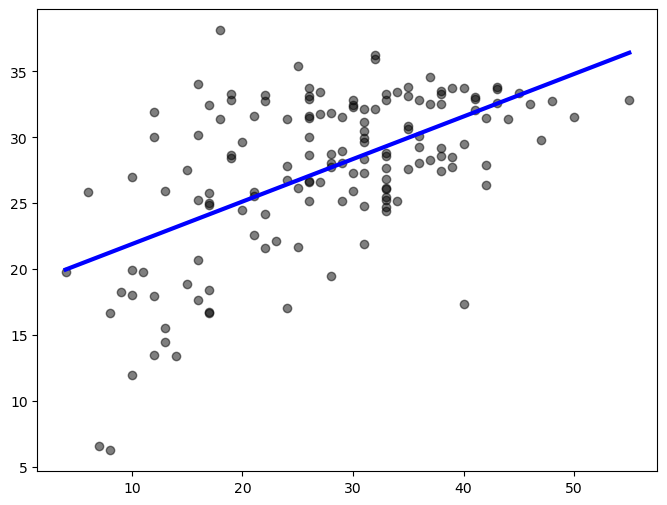

In [39]:
modelR2 = smf.ols(formula='do_ct ~ tempmax+feelslikemax+precipcover+humidity+windspeed', data=df_merged)
result = modelR2.fit()

predicted_values = result.predict()

plt.figure(figsize=(8, 6))
plt.scatter(df_merged['do_ct'], predicted_values, alpha=0.5, color = 'black')
plt.plot(np.unique(df_merged['do_ct']), np.poly1d(np.polyfit(df_merged['do_ct'], predicted_values, 1))(np.unique(df_merged['do_ct'])), color='blue', linewidth = 3)
plt.show()

### LASSO for Pickups

In [40]:
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

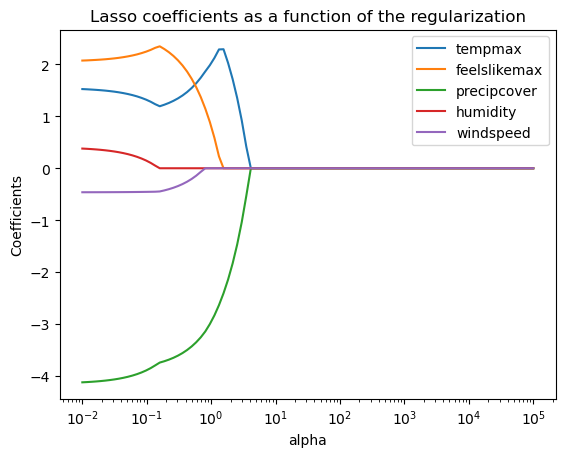

In [41]:
alphas = 10**np.linspace(-2,5,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train['pu_ct'])
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [42]:
# find the best alpha via CV with selected scoring metric
lassocvR1 = LassoCV(alphas=alphas)
lassocvR1.fit(scale(X_train),y_train['pu_ct'])

print('The best alpha from LassoCV:', lassocvR1.alpha_)

The best alpha from LassoCV: 0.4229242874389499


In [43]:
# with the best alpha
lasso.set_params(alpha=lassocvR1.alpha_)
lasso.fit(scale(X_train), y_train['pu_ct'])
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax         1.466462
feelslikemax    1.861543
precipcover    -3.498692
humidity        0.000000
windspeed      -0.259133
dtype: float64


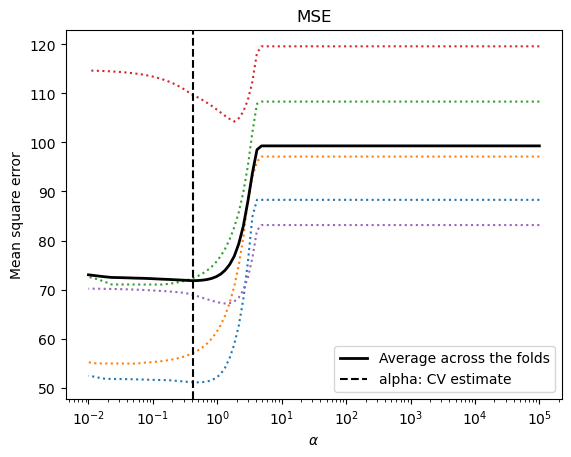

In [44]:
plt.semilogx(lassocvR1.alphas_, lassocvR1.mse_path_, linestyle=":")
plt.plot(
    lassocvR1.alphas_,
    lassocvR1.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocvR1.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [47]:
lasso_preds = lassocvR1.predict(scale(X_test))
lasso_r2 = r2_score(y_test['pu_ct'], lasso_preds)
lasso_mse = mean_squared_error(y_test['pu_ct'], lasso_preds)
print("Lasso Regression:")
print("R-squared:", lasso_r2)
print("MSE:", lasso_mse)

Lasso Regression:
R-squared: 0.33903604288491196
MSE: 82.6469331976706


In [48]:
lasso_r2_p = r2_score(y_test['pu_ct'], lassocvR1.predict(scale(X_test)))
print(f"R2 in pickup test data for Lasso is {lasso_r2_p}")

R2 in pickup test data for Lasso is 0.33903604288491196


In [49]:
#test data mse
lasso_mse_p = mean_squared_error(y_test['pu_ct'], lassocvR1.predict(scale(X_test)))
print(f"MSE in pickup test data for Lasso is {lasso_mse_p}")

MSE in pickup test data for Lasso is 82.6469331976706


### LASSO for Dropoffs

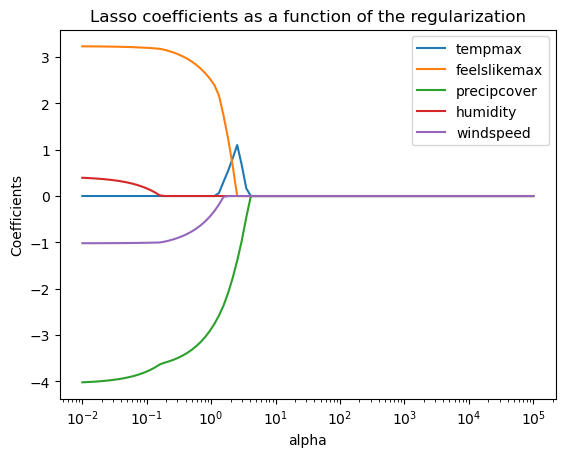

In [50]:
alphas = 10**np.linspace(-2,5,100)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train['do_ct'])
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.legend(list(X.columns), loc='best')

plt.title('Lasso coefficients as a function of the regularization');

In [51]:
# find the best alpha via CV with selected scoring metric
lassocvR2 = LassoCV(alphas=alphas)
lassocvR2.fit(scale(X_train),y_train['do_ct'])

print('The best alpha from LassoCV:', lassocvR2.alpha_)

The best alpha from LassoCV: 0.35938136638046275


In [52]:
# with the best alpha
lasso.set_params(alpha=lassocvR2.alpha_)
lasso.fit(scale(X_train), y_train['do_ct'])
print('The coefficients are:')
print(pd.Series(lasso.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax         0.000000
feelslikemax    3.016893
precipcover    -3.444571
humidity        0.000000
windspeed      -0.864153
dtype: float64


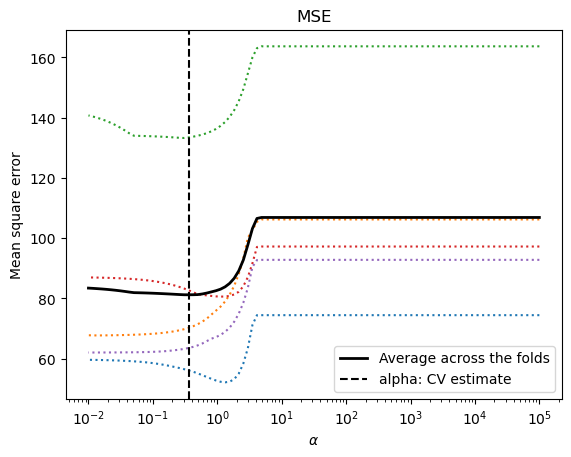

In [53]:
plt.semilogx(lassocvR2.alphas_, lassocvR2.mse_path_, linestyle=":")
plt.plot(
    lassocvR2.alphas_,
    lassocvR2.mse_path_.mean(axis=-1),
    color="black",
    label="Average across the folds",
    linewidth=2,
)
plt.axvline(lassocvR2.alpha_, linestyle="--", color="black", label="alpha: CV estimate")


plt.xlabel(r"$\alpha$")
plt.ylabel("Mean square error")
plt.legend()
plt.title("MSE")
plt.show()

In [54]:
lasso_r2_d = r2_score(y_test['do_ct'], lassocvR2.predict(scale(X_test)))
print(f"R2 in dropoff test data for Lasso is {lasso_r2_d}")

R2 in dropoff test data for Lasso is 0.343971607354408


In [55]:
#test data mse
lasso_mse_d = mean_squared_error(y_test['do_ct'], lassocvR2.predict(scale(X_test)))
print(f"MSE in dropoff test data for Lasso is {lasso_mse_d}")

MSE in dropoff test data for Lasso is 74.86213333642452


### Ridge for Pickups

In [56]:
alphas = 10**np.linspace(-2,5,100)

ridge = Ridge()
coefs = []

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)

In [57]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train['pu_ct'])

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 15.199110829529332


In [58]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train['pu_ct'])
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax         1.696525
feelslikemax    1.718139
precipcover    -3.243556
humidity       -0.130372
windspeed      -0.612939
dtype: float64


In [59]:
# find the best alpha via CV with selected scoring metric
ridgecvR1 = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecvR1.fit(scale(X_train), y_train['pu_ct'])

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 15.199110829529332


In [60]:
ridge_R1_p = r2_score(y_test['pu_ct'], ridgecvR1.predict(scale(X_test)))
print(f"R2 in pickup test data for Ridge is {ridge_R1_p}")

R2 in pickup test data for Ridge is 0.33373464071220116


In [61]:
ridge_mse_R1_p = mean_squared_error(y_test['pu_ct'], ridgecvR1.predict(scale(X_test)))
print(f"MSE in pickup test data for Ridge is {ridge_mse_R1_p}")

MSE in pickup test data for Ridge is 83.30982052534637


### Ridge for Dropoffs

In [62]:
# find the best alpha via CV with selected scoring metric
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecv.fit(scale(X_train), y_train['do_ct'])

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 17.886495290574352


In [63]:
# with the best alpha
ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X_train), y_train['do_ct'])
print('The coefficients are:')
print(pd.Series(ridge.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax         1.451149
feelslikemax    1.602013
precipcover    -3.077936
humidity       -0.100265
windspeed      -1.060527
dtype: float64


In [64]:
# find the best alpha via CV with selected scoring metric
ridgecvR2 = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error')
ridgecvR2.fit(scale(X_train), y_train['do_ct'])

print('The best alpha from RidgeCV:', ridgecv.alpha_)

The best alpha from RidgeCV: 17.886495290574352


In [65]:
ridge_R2_d = r2_score(y_test['do_ct'], ridgecvR2.predict(scale(X_test)))
print(f"R2 in dropoff test data for Ridge is {ridge_R2_d}")

R2 in dropoff test data for Ridge is 0.33424892361877545


In [66]:
ridge_mse_R2_d = mean_squared_error(y_test['do_ct'], ridgecvR2.predict(scale(X_test)))
print(f"MSE in dropff test data for Ridge is {ridge_mse_R2_d}")

MSE in dropff test data for Ridge is 75.9716292886798


### Elasticity for PickUps

In [67]:
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV

ENcv = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv.fit(scale(X_train), y_train['pu_ct'])

print('The best alpha from ElasticNetCV:', ENcv.alpha_)

The best alpha from ElasticNetCV: 0.35165481854972525


In [68]:
EN=ElasticNet()
EN.set_params(alpha=ENcv.alpha_)
EN.fit(scale(X_train), y_train['pu_ct'])

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax         1.631007
feelslikemax    1.618046
precipcover    -3.162971
humidity       -0.000000
windspeed      -0.478782
dtype: float64


In [69]:
elastic_R2_p = r2_score(y_test['pu_ct'], ENcv.predict(scale(X_test)))
print(f"R2 in pickup test data for Elastic Net is {elastic_R2_p}")

R2 in pickup test data for Elastic Net is 0.32628059167134227


In [70]:
elastic_mse_p = mean_squared_error(y_test['pu_ct'], ENcv.predict(scale(X_test)))
print(f"MSE in pickup test data for Elastic Net is {elastic_mse_p}")

MSE in pickup test data for Elastic Net is 84.24187481741536


### Elasticity for DropOffs

In [71]:
ENcv2 = ElasticNetCV(alphas=None, cv=10, max_iter=10000) # default l1_ratio=0.5
ENcv2.fit(scale(X_train), y_train['do_ct'])

print('The best alpha from ElasticNetCV:', ENcv2.alpha_)

The best alpha from ElasticNetCV: 0.42476496274669623


In [72]:
EN=ElasticNet()
EN.set_params(alpha=ENcv2.alpha_)
EN.fit(scale(X_train), y_train['do_ct'])

print('The coefficients are:')
print(pd.Series(EN.coef_.flatten(), index=X_train.columns))

The coefficients are:
tempmax         1.373940
feelslikemax    1.486332
precipcover    -2.940390
humidity       -0.000000
windspeed      -0.907506
dtype: float64


In [73]:
elastic_R2_d = r2_score(y_test['do_ct'], ENcv2.predict(scale(X_test)))
print(f"R2 in dropff test data for Elastic Net is {elastic_R2_d}")

R2 in dropff test data for Elastic Net is 0.3256993733373684


In [74]:
elastic_mse_d = mean_squared_error(y_test['do_ct'], ENcv2.predict(scale(X_test)))
print(f"MSE in dropff test data for Elastic Net is {elastic_mse_d}")

MSE in dropff test data for Elastic Net is 76.94725409441732


## KNN for PickUps

In [75]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [76]:
# Population parameters
beta0 = 1
beta1 = -2
beta2 = 6
beta3 = -1
sigma = 2

In [77]:
model1 = neighbors.KNeighborsRegressor(n_neighbors = 15)
model1.fit(X_train, y_train['pu_ct'])

KNeighborsRegressor(n_neighbors=15)

In [78]:
# Testing R2
KNN_r2_pu = r2_score(y_test['pu_ct'], model1.predict(X_test))
print(f"R2 in pickup test data for KNN is {KNN_r2_pu}")

R2 in pickup test data for KNN is 0.2838208810217767


In [79]:
# Testing MSE
KNN_mse_pu = mean_squared_error(y_test['pu_ct'], model1.predict(X_test))
print(f"MSE in pickup test data for KNN is {KNN_mse_pu}")

MSE in pickup test data for KNN is 89.55103703703703


In [80]:
# Training R2
KNN_r2_tr_pu = r2_score(y_train['pu_ct'], model1.predict(X_train))
print(f"R2 in pickup training data for KNN is {KNN_r2_tr_pu}")

R2 in pickup training data for KNN is 0.3046381983507733


In [81]:
# Tranining MSE
KNN_mse_tr_pu = mean_squared_error(y_train['pu_ct'], model1.predict(X_train))
print(f"MSE in pickup training data for KNN is {KNN_mse_tr_pu}")

MSE in pickup training data for KNN is 68.1269135802469


In [82]:
KNN_mse_tr_pu = [-1]*30
KNN_mse_pu = [-1]*30
for K in range(30):
    model1 = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model1.fit(X_train, y_train['do_ct'])  #fit the model
    KNN_mse_tr_pu[K] = mean_squared_error(y_train['do_ct'], model1.predict(X_train))
    KNN_mse_pu[K] = mean_squared_error(y_test['do_ct'], model1.predict(X_test))

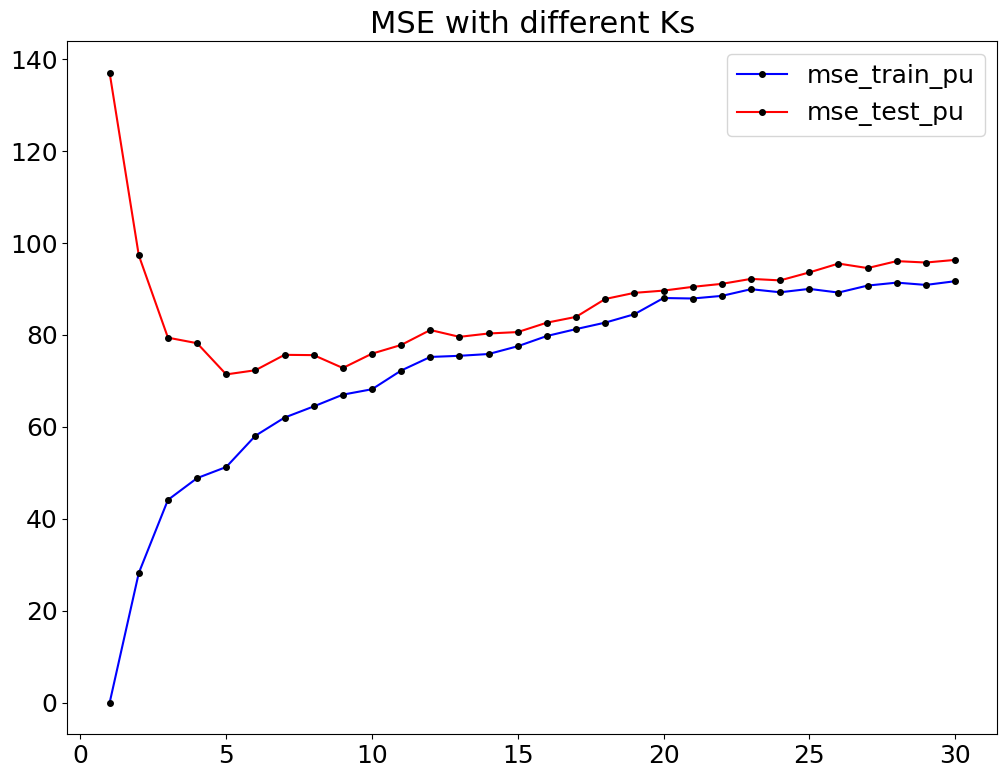

In [83]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, KNN_mse_tr_pu,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train_pu')
plt.plot(np.arange(30)+1, KNN_mse_pu,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test_pu')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [84]:
# optimal k
np.argmin(KNN_mse_pu)+1

5

In [85]:
# optimal test MSE
min(KNN_mse_pu)

71.41533333333334

## KNN for DropOffs

In [86]:
# Population parameters
beta0 = 1
beta1 = -2
beta2 = 6
beta3 = -1
sigma = 2

In [87]:
model2 = neighbors.KNeighborsRegressor(n_neighbors = 15)
model2.fit(X_train, y_train['do_ct'])

KNeighborsRegressor(n_neighbors=15)

In [88]:
# Testing R2
KNN_r2_do = r2_score(y_test['do_ct'], model2.predict(X_test))
print(f"R2 in dropff test data for KNN is {KNN_r2_do}")

R2 in dropff test data for KNN is 0.2934755885309789


In [89]:
# Testing MSE
KNN_mse_do = mean_squared_error(y_test['do_ct'], model2.predict(X_test))
print(f"MSE in dropff test data for KNN is {KNN_mse_do}")

MSE in dropff test data for KNN is 80.62444444444445


In [90]:
# Training R2
KNN_r2_tr_do = r2_score(y_train['do_ct'], model2.predict(X_train))
print(f"R2 in dropff training data for KNN is {KNN_r2_tr_do}")

R2 in dropff training data for KNN is 0.2729433390903323


In [91]:
# Trainingg MSE
KNN_mse_tr_do = mean_squared_error(y_train['do_ct'], model2.predict(X_train))
print(f"MSE in dropff training data for KNN is {KNN_mse_tr_do}")

MSE in dropff training data for KNN is 77.54158024691358


In [92]:
KNN_mse_tr_do = [-1]*30
KNN_mse_do = [-1]*30
for K in range(30):
    model2 = neighbors.KNeighborsRegressor(n_neighbors = K+1)
    model2.fit(X_train, y_train['do_ct'])  #fit the model
    KNN_mse_tr_do[K] = mean_squared_error(y_train['do_ct'], model2.predict(X_train))
    KNN_mse_do[K] = mean_squared_error(y_test['do_ct'], model2.predict(X_test))

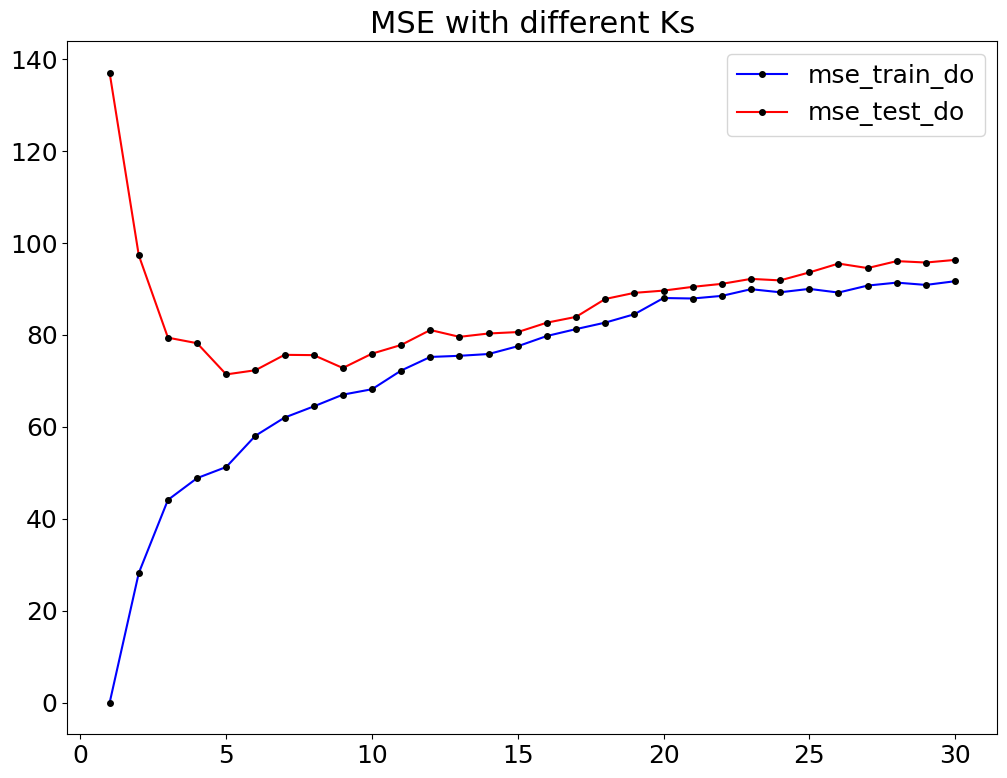

In [93]:
import matplotlib.pyplot as plt
fig, ax1 = plt.subplots(figsize=(12, 9))
plt.plot(np.arange(30)+1, KNN_mse_tr_do,  color = 'blue', marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black',label = 'mse_train_do')
plt.plot(np.arange(30)+1, KNN_mse_do,  color = 'red',marker = '.', markersize = 8, markeredgecolor = 'black', markerfacecolor = 'black', label = 'mse_test_do')
plt.legend(fontsize=18)
plt.title('MSE with different Ks', fontsize=22)
plt.tick_params(labelsize=18)
plt.show()

In [94]:
# optimal k
np.argmin(KNN_mse_do)+1

5

In [95]:
# optimal test MSE
min(KNN_mse_do)

71.41533333333334

### R2 Comparison for Pickups and Dropoffs for all the Regression Model

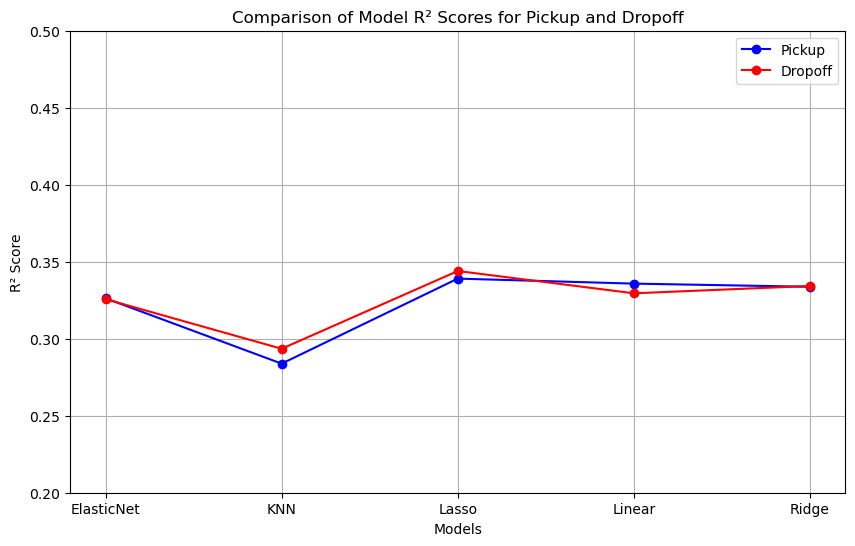

In [96]:
import matplotlib.pyplot as plt

pickup_scores = {
    'Lasso': lasso_r2_p,
    'Linear': r_squared_pu,
    'Ridge': ridge_R1_p,
    'ElasticNet': elastic_R2_p,
    'KNN': KNN_r2_pu
}

dropoff_scores = {
    'Lasso': lasso_r2_d,
    'Linear': r_squared_do,
    'Ridge': ridge_R2_d,
    'ElasticNet': elastic_R2_d,
    'KNN': KNN_r2_do
}

# Ensure both dictionaries have the same model order
sorted_model_names = sorted(pickup_scores.keys())
pickup_sorted_scores = [pickup_scores[model] for model in sorted_model_names]
dropoff_sorted_scores = [dropoff_scores[model] for model in sorted_model_names]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(sorted_model_names, pickup_sorted_scores, marker='o', linestyle='-', color='b', label='Pickup')
plt.plot(sorted_model_names, dropoff_sorted_scores, marker='o', linestyle='-', color='r', label='Dropoff')
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Comparison of Model R² Scores for Pickup and Dropoff')
plt.ylim(0.2, 0.5)
plt.legend()
plt.grid(True)
plt.show()

#### R2 for pickups

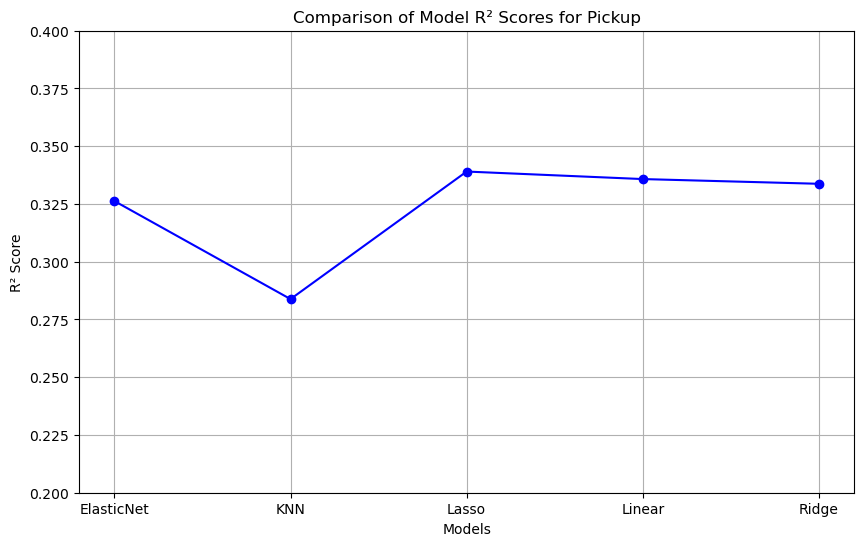

In [97]:
r2_scores = {
    'Lasso': lasso_r2_p,
    'Linear': r_squared_pu,
    'Ridge': ridge_R1_p,
    'ElasticNet': elastic_R2_p,
    'KNN': KNN_r2_pu
}


sorted_model_names = sorted(r2_scores.keys())
sorted_scores = [r2_scores[model] for model in sorted_model_names]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(sorted_model_names, sorted_scores, marker='o', linestyle='-', color='b')  # 'o' for circle markers
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Comparison of Model R² Scores for Pickup')
plt.ylim(0.2, 0.4)  # Adjust y-axis to show scores from 0 to 1
plt.grid(True)
plt.show()

#### R2 for dropofss

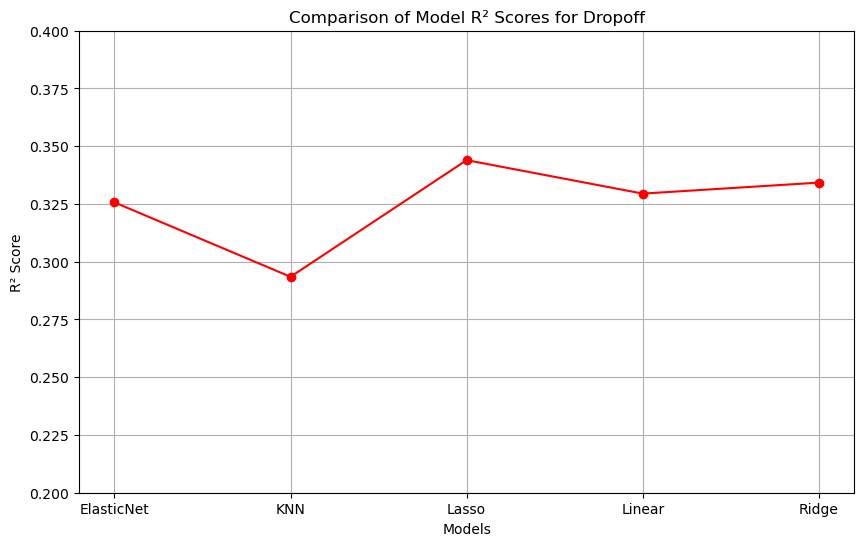

In [98]:
r2_scores = {
    'Lasso': lasso_r2_d,
    'Linear': r_squared_do,
    'Ridge': ridge_R2_d,
    'ElasticNet': elastic_R2_d,
    'KNN': KNN_r2_do
}

sorted_model_names = sorted(r2_scores.keys())
sorted_scores = [r2_scores[model] for model in sorted_model_names]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(sorted_model_names, sorted_scores, marker='o', linestyle='-', color='r')  # 'o' for circle markers
plt.xlabel('Models')
plt.ylabel('R² Score')
plt.title('Comparison of Model R² Scores for Dropoff')
plt.ylim(0.2, 0.4)  # Adjust y-axis to show scores from 0 to 1
plt.grid(True)
plt.show()

#### MSE for both Pickups and Dropoffs

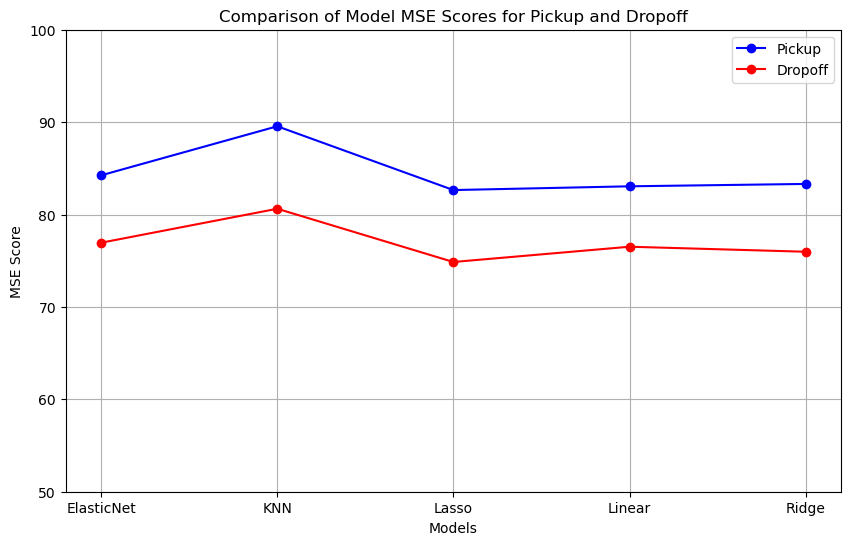

In [99]:
pickup_mse = {
    'Lasso': lasso_mse_p,
    'Linear': mseR1_test_pu,
    'Ridge': ridge_mse_R1_p,
    'ElasticNet': elastic_mse_p,
    'KNN': 89.5510
}

dropoff_mse = {
    'Lasso': lasso_mse_d,
    'Linear': mseR2_test_do,
    'Ridge': ridge_mse_R2_d,
    'ElasticNet': elastic_mse_d,
    'KNN': 80.6244
}

# Ensure both dictionaries have the same model order
sorted_model_names = sorted(pickup_mse.keys())
pickup_sorted_mse = [pickup_mse[model] for model in sorted_model_names]
dropoff_sorted_mse = [dropoff_mse[model] for model in sorted_model_names]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(sorted_model_names, pickup_sorted_mse, marker='o', linestyle='-', color='b', label='Pickup')
plt.plot(sorted_model_names, dropoff_sorted_mse, marker='o', linestyle='-', color='r', label='Dropoff')
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.title('Comparison of Model MSE Scores for Pickup and Dropoff')
plt.ylim(50, 100)
plt.legend()
plt.grid(True)
plt.show()

#### MSE for pickups

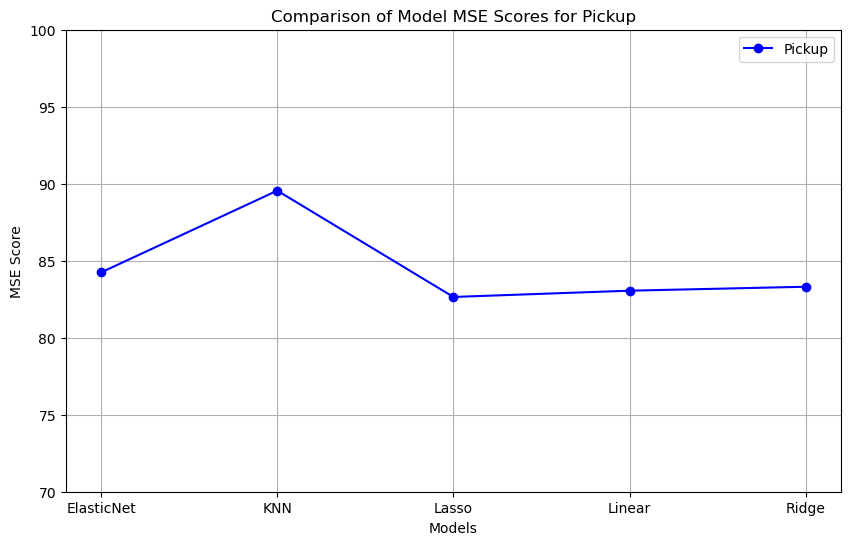

In [100]:
pickup_mse = {
    'Lasso': lasso_mse_p,
    'Linear': mseR1_test_pu,
    'Ridge': ridge_mse_R1_p,
    'ElasticNet': elastic_mse_p,
    'KNN': 89.5510
}

# Ensure both dictionaries have the same model order
sorted_model_names = sorted(pickup_mse.keys())
pickup_sorted_mse = [pickup_mse[model] for model in sorted_model_names]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(sorted_model_names, pickup_sorted_mse, marker='o', linestyle='-', color='b', label='Pickup')
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.title('Comparison of Model MSE Scores for Pickup')
plt.ylim(70, 100)
plt.legend()
plt.grid(True)
plt.show()

#### MSE for dropofss

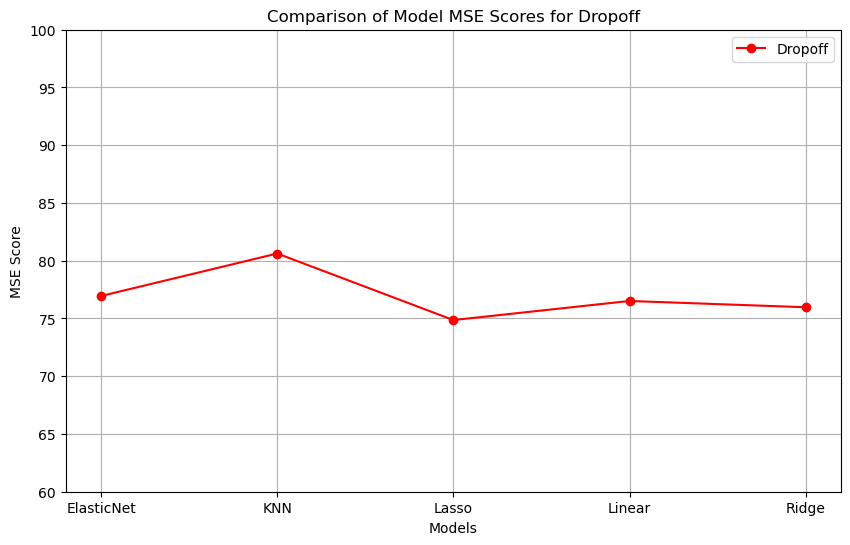

In [101]:
dropoff_mse = {
    'Lasso': lasso_mse_d,
    'Linear': mseR2_test_do,
    'Ridge': ridge_mse_R2_d,
    'ElasticNet': elastic_mse_d,
    'KNN': 80.6244
}

# Ensure both dictionaries have the same model order
sorted_model_names = sorted(pickup_mse.keys())
dropoff_sorted_mse = [dropoff_mse[model] for model in sorted_model_names]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(sorted_model_names, dropoff_sorted_mse, marker='o', linestyle='-', color='r', label='Dropoff')
plt.xlabel('Models')
plt.ylabel('MSE Score')
plt.title('Comparison of Model MSE Scores for Dropoff')
plt.ylim(60, 100)
plt.legend()
plt.grid(True)
plt.show()

### **Decision Performance Evaluation**

#### **Average Total Cost for Unsuccessful Pickups and Dropoffs**


### **Assumption**

**To develop an optimal cost strategy, we begin with the assumption that there are 17 available docks. Among these, an average of 10 bikes will consistently be available for pickup (referred to as "pu_ct"), leaving 7 docks empty for drop-off (referred to as "do_ct"). In case of a failed pickup attempt, the company incurs a loss of $2,  while an unsuccessful drop-off results in a loss of $3.**

### Cost Strategy for Lasso

In [104]:
# Constants based on your business strategy
alpha = 2  # Penalty for each unsuccessful pickup
beta = 3   # Penalty for each unsuccessful drop-off



# Predict using your trained Lasso models
y_pred_pu_ct = lassocvR1.predict(scale(X_test)) # Predicted pickups
y_pred_do_ct = lassocvR2.predict(scale(X_test)) # Predicted drop-offs

# Initialize variable to track the maximum combined cost per instance
max_combined_cost = 0

total_costs = []  # Initialize list to keep track of total costs

for i in range(len(y_test)):
    actual_pu = y_test.iloc[i]['pu_ct']
    actual_do = y_test.iloc[i]['do_ct']
    predicted_pu = y_pred_pu_ct[i]
    predicted_do = y_pred_do_ct[i]


    # Calculate individual costs for pickups and drop-offs correctly
    pu_cost = alpha * max(0, predicted_pu - 10)
    do_cost = beta * max(0, predicted_do - 7)

    combined_cost = pu_cost + do_cost
    total_costs.append(combined_cost)  # Summing the total cost for later averaging

# Update maximum combined cost
max_combined_cost_lasso = max(0, combined_cost)

# Calculate the average total cost from all total costs
average_cost_lasso = sum(total_costs) / len(total_costs)

# Print the maximum combined cost and average total cost
print("Maximum combined cost per instance:", max_combined_cost_lasso)
print("Average total cost:", average_cost_lasso)

Maximum combined cost per instance: 115.74161204786625
Average total cost: 93.8538391553682


### Cost Strategy for Linear

In [106]:
# Constants based on your business strategy
alpha = 2  # Penalty for each unsuccessful pickup
beta = 3   # Penalty for each unsuccessful drop-off


# Predict using your trained Linear models
y_pred_pu_ct = ModelR1.predict(X_test[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']])
y_pred_do_ct = ModelR2.predict(X_test[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']])

# Initialize variable to track the maximum combined cost per instance
max_combined_cost = 0

total_costs = []  # Initialize list to keep track of total costs

# Go through each prediction and actual values to calculate and track costs
for i in range(len(y_test)):
    actual_pu = y_test.iloc[i]['pu_ct']
    actual_do = y_test.iloc[i]['do_ct']
    predicted_pu = y_pred_pu_ct[i]
    predicted_do = y_pred_do_ct[i]


    # Calculate individual costs for pickups and drop-offs correctly
    pu_cost = alpha * max(0, predicted_pu - 10)
    do_cost = beta * max(0, predicted_do - 7)

    combined_cost = pu_cost + do_cost
    total_costs.append(combined_cost)  # Summing the total cost for later averaging

# Update maximum combined cost
max_combined_cost_lin = max(0, combined_cost)

# Calculate the average total cost from all total costs
average_cost_lin = sum(total_costs) / len(total_costs)

# Print the maximum combined cost and average total cost
print("Maximum combined cost per instance:", max_combined_cost_lin)
print("Average total cost:", average_cost_lin)

Maximum combined cost per instance: [122.08088169]
Average total cost: [93.16361053]


### Cost Strategy for Ridge

In [107]:
# Constants based on your business strategy
alpha = 2  # Penalty for each unsuccessful pickup
beta = 3   # Penalty for each unsuccessful drop-off


# Predict using your trained Ridge models
y_pred_pu_ct = ridgecvR1.predict(scale(X_test))
y_pred_do_ct = ridgecvR2.predict(scale(X_test))

# Initialize variable to track the maximum combined cost per instance
max_combined_cost = 0

total_costs = []  # Initialize list to keep track of total costs

for i in range(len(y_test)):
    actual_pu = y_test.iloc[i]['pu_ct']
    actual_do = y_test.iloc[i]['do_ct']
    predicted_pu = y_pred_pu_ct[i]
    predicted_do = y_pred_do_ct[i]


    # Calculate individual costs for pickups and drop-offs correctly
    pu_cost = alpha * max(0, predicted_pu - 10)
    do_cost = beta * max(0, predicted_do - 7)

    combined_cost = pu_cost + do_cost
    total_costs.append(combined_cost)  # Summing the total cost for later averaging

# Update maximum combined cost
max_combined_cost_rd = max(0, combined_cost)

# Calculate the average total cost from all total costs
average_cost_rd = sum(total_costs) / len(total_costs)

# Print the maximum combined cost and average total cost
print("Maximum combined cost per instance:", max_combined_cost_rd)
print("Average total cost:", average_cost_rd)

Maximum combined cost per instance: 116.7486281550104
Average total cost: 93.83653148924398


### Cost Strategy for Elasticity

In [108]:
# Constants based on your business strategy
alpha = 2  # Penalty for each unsuccessful pickup
beta = 3   # Penalty for each unsuccessful drop-off


# Predict using your trained Elasticity models
y_pred_pu_ct = ENcv.predict(scale(X_test))
y_pred_do_ct = ENcv2.predict(scale(X_test))

# Initialize variable to track the maximum combined cost per instance
max_combined_cost = 0

total_costs = []  # Initialize list to keep track of total costs

for i in range(len(y_test)):
    actual_pu = y_test.iloc[i]['pu_ct']
    actual_do = y_test.iloc[i]['do_ct']
    predicted_pu = y_pred_pu_ct[i]
    predicted_do = y_pred_do_ct[i]

   # Calculate individual costs for pickups and drop-offs correctly
    pu_cost = alpha * max(0, predicted_pu - 10)
    do_cost = beta * max(0, predicted_do - 7)

    combined_cost = pu_cost + do_cost
    total_costs.append(combined_cost)  # Summing the total cost for later averaging

# Update maximum combined cost
max_combined_cost_ela = max(0, combined_cost)

# Calculate the average total cost from all total costs
average_cost_ela = sum(total_costs) / len(total_costs)

# Print the maximum combined cost and average total cost
print("Maximum combined cost per instance:", max_combined_cost_ela)
print("Average total cost:", average_cost_ela)

Maximum combined cost per instance: 115.00400263398991
Average total cost: 93.80157180452804


### Cost Strategy for KNN

In [109]:
# Constants based on your business strategy
alpha = 2  # Penalty for each unsuccessful pickup
beta = 3   # Penalty for each unsuccessful drop-off

# Predict using your trained KNN models
y_pred_pu_ct = model1.predict(X_test)
y_pred_do_ct = model2.predict(X_test)

# Initialize variable to track the maximum combined cost per instance
max_combined_cost = 0

total_costs = []  # Initialize list to keep track of total costs

for i in range(len(y_test)):
    actual_pu = y_test.iloc[i]['pu_ct']
    actual_do = y_test.iloc[i]['do_ct']
    predicted_pu = y_pred_pu_ct[i]
    predicted_do = y_pred_do_ct[i]

    # Calculate individual costs for pickups and drop-offs correctly
    pu_cost = alpha * max(0, predicted_pu - 10)
    do_cost = beta * max(0, predicted_pu - 7)

    combined_cost = pu_cost + do_cost
    total_costs.append(combined_cost)  # Summing the total cost for later averaging

# Update maximum combined cost
max_combined_cost_knn = max(0, combined_cost)

# Calculate the average total cost from all total costs
average_cost_knn = sum(total_costs) / len(total_costs)

# Print the maximum combined cost and average total cost
print("Maximum combined cost per instance:", max_combined_cost_knn)
print("Average total cost:", average_cost_knn)

Maximum combined cost per instance: 119.0
Average total cost: 104.22222222222221


### Plot to compare the Average and Maximum cost for different Models

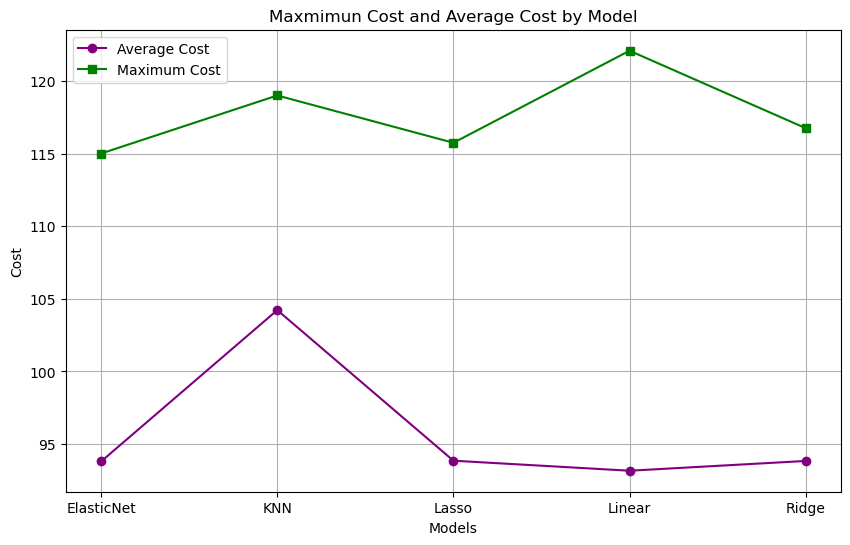

In [110]:
average_costs = {
    'Lasso': average_cost_lasso,
    'Linear': average_cost_lin.item(),
    'Ridge': average_cost_rd,
    'ElasticNet': average_cost_ela,
    'KNN': average_cost_knn
}
sorted_model_names = sorted(average_costs.keys())
sorted_costs = [average_costs[model] for model in sorted_model_names]

max_combined_cost = {
    'Lasso': max_combined_cost_lasso,
    'Linear': max_combined_cost_lin.item(),
    'Ridge': max_combined_cost_rd,
    'ElasticNet': max_combined_cost_ela,
    'KNN': max_combined_cost_knn
}
sorted_max_combined_cost = [max_combined_cost[model] for model in sorted_model_names]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sorted_model_names, sorted_costs, marker='o', linestyle='-', color='purple', label='Average Cost')
plt.plot(sorted_model_names, sorted_max_combined_cost, marker='s', linestyle='-', color='green', label='Maximum Cost')
plt.xlabel('Models')
plt.ylabel('Cost')
plt.title('Maxmimun Cost and Average Cost by Model')
plt.grid(True)
plt.legend()
plt.show()

### **Average Quality of Service for Pickups and Dropoffs**

**Assumptions**

To develop an optimal cost strategy, we begin with the assumption that there are 17 available docks. Among these, an average of 10 bikes will consistently be available for pickup (referred to as "pu_ct"), leaving 7 docks empty for drop-off (referred to as "do_ct"). In case of a failed pickup attempt, the company incurs a loss of $2, while an unsuccessful drop-off results in a loss of $3. Also we have given the equal weightage for pickup and dropoff which is 0.5 for both the case.


### Quality of Sevice for Lasso Regression Model

In [112]:
# Constants based on your business strategy
alpha = 0.5  # Penalty for each unsuccessful pickup
beta = 0.5   # Penalty for each unsuccessful drop-off


# Predict using your trained Lasso models
y_pred_pu_ct = lassocvR1.predict(scale(X_test)) # Predicted pickups
y_pred_do_ct = lassocvR2.predict(scale(X_test)) # Predicted drop-offs

# Initialize variable to track the maximum combined cost per instance
max_combined_qt = 0

total_qt = []  # Initialize list to keep track of total quantity

for i in range(len(y_test)):
    actual_pu = y_test.iloc[i]['pu_ct']
    actual_do = y_test.iloc[i]['do_ct']
    predicted_pu = y_pred_pu_ct[i]
    predicted_do = y_pred_do_ct[i]

    predicted_pu = max(1, predicted_pu)
    predicted_do = max(1, predicted_do)


    # Calculate individual quantity for pickups and drop-offs correctly
    pu_qt = alpha * min(13, predicted_pu)/predicted_pu
    do_qt = beta * min(8, predicted_do)/predicted_do

    combined_qt = pu_qt + do_qt
    total_qt.append(combined_qt)

# Update maximum combined quantity
max_qt_lasso = max(total_qt)

# Calculate the average total cost from all total quantity
average_qt_lasso = sum(total_qt) / len(total_qt)

# Print the maximum combined quantity and average total quantity
print("Maximum quality of service:", max_qt_lasso)
print("Average quality of service:", average_qt_lasso)

Maximum quality of service: 0.8619220593334443
Average quality of service: 0.41316396702007896


### Quality of Sevice for Linear Regression Model

In [113]:
# Constants based on your business strategy
alpha = 0.5  # Penalty for each unsuccessful pickup
beta = 0.5   # Penalty for each unsuccessful drop-off


# Predict using your trained Linear models
y_pred_pu_ct = ModelR1.predict(X_test[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']])
y_pred_do_ct = ModelR2.predict(X_test[['tempmax', 'feelslikemax', 'precipcover', 'humidity', 'windspeed']])

# Initialize variable to track the maximum combined cost per instance
max_combined_qt = 0

total_qt = []  # Initialize list to keep track of total quantity

for i in range(len(y_test)):
    actual_pu = y_test.iloc[i]['pu_ct']
    actual_do = y_test.iloc[i]['do_ct']
    predicted_pu = y_pred_pu_ct[i]
    predicted_do = y_pred_do_ct[i]

    predicted_pu = max(1, predicted_pu)
    predicted_do = max(1, predicted_do)


    # Calculate individual quantity for pickups and drop-offs correctly
    pu_qt = alpha * min(13, predicted_pu)/predicted_pu
    do_qt = beta * min(8, predicted_do)/predicted_do

    combined_qt = pu_qt + do_qt
    total_qt.append(combined_qt)

# Update maximum combined quantity
max_qt_lin = max(total_qt)

# Calculate the average total cost from all total quantity
average_qt_lin = sum(total_qt) / len(total_qt)

# Print the maximum combined quantity and average total quantity
print("Maximum quality of service:", max_qt_lin)
print("Average quality of service:", average_qt_lin)

Maximum quality of service: [1.]
Average quality of service: [0.42774035]


### Quality of Sevice for Ridge Regression Model

In [114]:
# Constants based on your business strategy
alpha = 0.5  # Penalty for each unsuccessful pickup
beta = 0.5   # Penalty for each unsuccessful drop-off


# Predict using your trained Ridge models
y_pred_pu_ct = ridgecvR1.predict(scale(X_test))
y_pred_do_ct = ridgecvR2.predict(scale(X_test))

# Initialize variable to track the maximum combined cost per instance
max_combined_qt = 0

total_qt = []  # Initialize list to keep track of total quantity

for i in range(len(y_test)):
    actual_pu = y_test.iloc[i]['pu_ct']
    actual_do = y_test.iloc[i]['do_ct']
    predicted_pu = y_pred_pu_ct[i]
    predicted_do = y_pred_do_ct[i]

    predicted_pu = max(1, predicted_pu)
    predicted_do = max(1, predicted_do)


    # Calculate individual quantity for pickups and drop-offs correctly
    pu_qt = alpha * min(13, predicted_pu)/predicted_pu
    do_qt = beta * min(8, predicted_do)/predicted_do

    combined_qt = pu_qt + do_qt
    total_qt.append(combined_qt)

# Update maximum combined quantity
max_qt_rd = max(total_qt)

# Calculate the average total cost from all total quantity
average_qt_rd = sum(total_qt) / len(total_qt)

# Print the maximum combined quantity and average total quantity
print("Maximum quality of service:", max_qt_rd)
print("Average quality of service:", average_qt_rd)

Maximum quality of service: 0.8354238920342856
Average quality of service: 0.412664427759748


### Quality of Sevice for Elasticity Model

In [115]:
# Constants based on your business strategy
alpha = 0.5  # Penalty for each unsuccessful pickup
beta = 0.5   # Penalty for each unsuccessful drop-off


# Predict using your trained Elasticity models
y_pred_pu_ct = ENcv.predict(scale(X_test))
y_pred_do_ct = ENcv2.predict(scale(X_test))

# Initialize variable to track the maximum combined cost per instance
max_combined_qt = 0

total_qt = []  # Initialize list to keep track of total quantity

for i in range(len(y_test)):
    actual_pu = y_test.iloc[i]['pu_ct']
    actual_do = y_test.iloc[i]['do_ct']
    predicted_pu = y_pred_pu_ct[i]
    predicted_do = y_pred_do_ct[i]

    predicted_pu = max(1, predicted_pu)
    predicted_do = max(1, predicted_do)

    # Calculate individual quantity for pickups and drop-offs correctly
    pu_qt = alpha * min(13, predicted_pu)/predicted_pu
    do_qt = beta * min(8, predicted_do)/predicted_do

    combined_qt = pu_qt + do_qt
    total_qt.append(combined_qt)

# Update maximum combined quantity
max_qt_ela = max(total_qt)

# Calculate the average total cost from all total quantity
average_qt_ela = sum(total_qt) / len(total_qt)

# Print the maximum combined quantity and average total quantity
print("Maximum quality of service:", max_qt_ela)
print("Average quality of service:", average_qt_ela)

Maximum quality of service: 0.8095663124486221
Average quality of service: 0.41086908533100314


### Quality of Sevice for KNN Regression Model

In [116]:
# Constants based on your business strategy
alpha = 0.5  # Penalty for each unsuccessful pickup
beta = 0.5   # Penalty for each unsuccessful drop-off


# Predict using your trained KNN models
y_pred_pu_ct = model1.predict(X_test)
y_pred_do_ct = model2.predict(X_test)

# Initialize variable to track the maximum combined cost per instance
max_combined_qt = 0

total_qt = []  # Initialize list to keep track of total quantity

for i in range(len(y_test)):
    actual_pu = y_test.iloc[i]['pu_ct']
    actual_do = y_test.iloc[i]['do_ct']
    predicted_pu = y_pred_pu_ct[i]
    predicted_do = y_pred_do_ct[i]

    predicted_pu = max(1, predicted_pu)
    predicted_do = max(1, predicted_do)

    # Calculate individual quantity for pickups and drop-offs correctly
    pu_qt = alpha * min(13, predicted_pu)/predicted_pu
    do_qt = beta * min(8, predicted_do)/predicted_do

    combined_qt = pu_qt + do_qt
    total_qt.append(combined_qt)

# Update maximum combined quantity
max_qt_knn = max(total_qt)

# Calculate the average total cost from all total quantity
average_qt_knn = sum(total_qt) / len(total_qt)

# Print the maximum combined quantity and average total quantity
print("Maximum quality of service:", max_qt_knn)
print("Average quality of service:", average_qt_knn)

Maximum quality of service: 0.45064377682403434
Average quality of service: 0.36450075982809804


### Plot Compare the  Average and Maxmimun Quality of Service using different Models

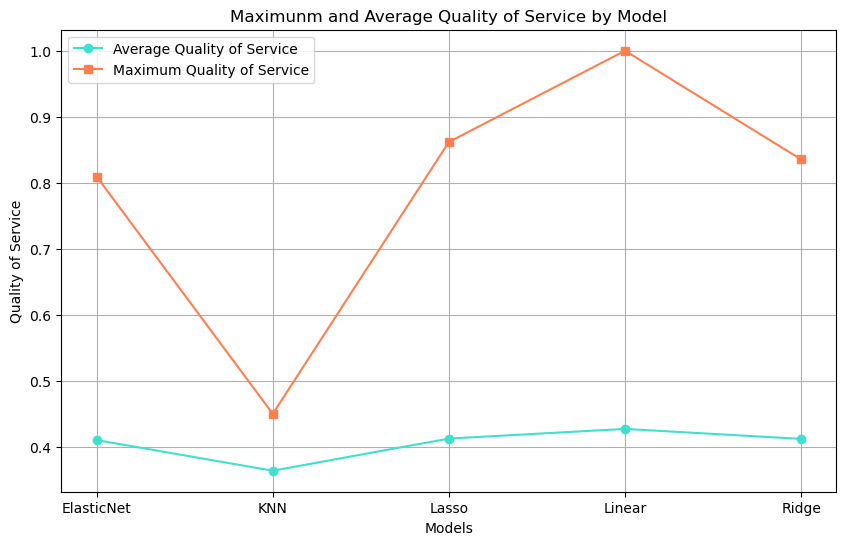

In [117]:
average_quality_of_service = {
    'Lasso': average_qt_lasso,
    'Linear': average_qt_lin.item(),
    'Ridge': average_qt_rd,
    'ElasticNet': average_qt_ela,
    'KNN': average_qt_knn
}
sorted_model_names = sorted(average_quality_of_service.keys())
sorted_avg_quality = [average_quality_of_service[model] for model in sorted_model_names]

maxmimum_quality_of_service = {
    'Lasso': max_qt_lasso,
    'Linear': max_qt_lin.item(),
    'Ridge': max_qt_rd,
    'ElasticNet': max_qt_ela,
    'KNN': max_qt_knn
}
sorted_max_quality = [maxmimum_quality_of_service[model] for model in sorted_model_names]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(sorted_model_names, sorted_avg_quality, marker='o', linestyle='-', color='turquoise', label='Average Quality of Service')
plt.plot(sorted_model_names, sorted_max_quality, marker='s', linestyle='-', color='coral', label='Maximum Quality of Service')
plt.xlabel('Models')
plt.ylabel('Quality of Service')
plt.title('Maximunm and Average Quality of Service by Model')
plt.grid(True)
plt.legend()
plt.show()